# **Sentiment Analysis of Google Play Store Reviews Using Recurrent Neural Networks**

### **Introduction**
In this project, we explore sentiment analysis on user reviews from the Google Play Store. Sentiment analysis is a natural language processing (NLP) technique that uses machine learning to determine the tone of a text. By training a Recurrent Neural Network (RNN) on review data, we aim to classify each review as **positive**, **neutral**, or **negative**. This information can help app developers and marketers understand user sentiment at scale, allowing for data-driven improvements and strategic decisions.

### **Objective**
Our primary goal is to build a robust model that accurately classifies user sentiment, transforming unstructured textual data into structured insights. By leveraging an RNN, a deep learning architecture well-suited for sequential data, we can capture the nuanced patterns in text reviews that indicate sentiment.

### **Project Workflow**
The notebook is structured into the following key steps:
1. **Data Loading and Exploration**: Load the dataset and perform initial exploration to understand its structure and quality.
2. **Data Preprocessing**: Clean and preprocess the text data, preparing it for model training through tokenization and padding.
3. **Model Building**: Define and compile a Recurrent Neural Network (RNN) model using TensorFlow and Keras.
4. **Model Training**: Train the model on the labeled review data and monitor performance metrics.
5. **Evaluation**: Evaluate the trained model on test data, and visualize the results with performance metrics.
6. **Prediction**: Use the model to predict sentiment on new or unseen review text.

# Import dependencies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from pathlib import Path
import pickle

# Data Processing

In [2]:
# Read the dataset from csv file using pandas
df = pd.read_csv('googleplaystore_user_reviews.csv', sep=",", header=0)

In total, there is 64295 entries, but only 37427 has reviews and 37432 has non-null sentiment (labels).

In [3]:
# Print information about dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
# Eliminate the NaN values
df = df.dropna()

In [5]:
# Check that the null values were eliminated
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Get only the `translated_review` and `sentiment` columns, which are the review and sentiment that we want to predict

In [6]:
df = df[['Translated_Review','Sentiment']]
df.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


Check out the distribution of label data.
There is much more examples of Positive reviews rather tan Negative or Neutral

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


<AxesSubplot:xlabel='Sentiment'>

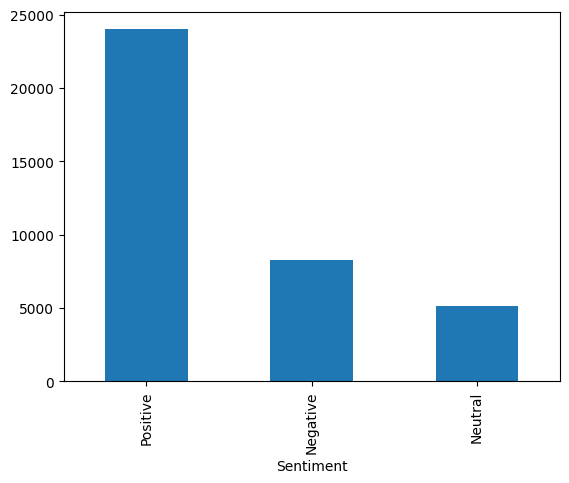

In [7]:
print(df['Sentiment'].value_counts())
df['Sentiment'].value_counts().plot.bar()

We are going to predict whether the review has any of the 3 likely labels:
- Positive
- Negative
- Neutral

Thus, the first step is encoding. We are going to encode output labels using **hot-encoding**

In [8]:
df["Sentiment"] = df["Sentiment"].astype('category')
df["Sentiment_cat"] = df["Sentiment"].cat.codes
print(df.head())

ordered_categories = df["Sentiment"].cat.categories

print("\nCategories in order: "  + str(ordered_categories))

x_raw = df['Translated_Review']
y = df['Sentiment_cat']

                                   Translated_Review Sentiment  Sentiment_cat
0  I like eat delicious food. That's I'm cooking ...  Positive              2
1    This help eating healthy exercise regular basis  Positive              2
3         Works great especially going grocery store  Positive              2
4                                       Best idea us  Positive              2
5                                           Best way  Positive              2

Categories in order: Index(['Negative', 'Neutral', 'Positive'], dtype='object')


We get the input (x) and output(y) data from the about dataframe

In [9]:
# Convert to numpy arrays
x_raw = x_raw.to_numpy()
y = y.to_numpy()

## Tokerization of data

In [10]:
VOCABULARY_SIZE = 5000

tokenizer = Tokenizer(num_words = VOCABULARY_SIZE)
tokenizer.fit_on_texts(x_raw)

x_tokenized = tokenizer.texts_to_sequences(x_raw)

In [11]:
print("Raw input data:")
print(x_raw[0:4])

print("\nTokenized input data:")
print(x_tokenized[0:4])

print("\nConvertedTokenized input data:")
print(tokenizer.sequences_to_texts(x_tokenized[0:4]))

Raw input data:
['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'
 'This help eating healthy exercise regular basis'
 'Works great especially going grocery store' 'Best idea us']

Tokenized input data:
[[1, 5, 807, 3588, 212, 195, 20, 1514, 212, 1885, 983, 197, 37, 883, 367, 81, 25, 37, 512, 4936, 273], [7, 110, 1417, 1373, 1075, 1059, 2219], [90, 9, 408, 134, 1923, 333], [37, 439, 199]]

ConvertedTokenized input data:
["i like eat delicious food that's i'm cooking food myself case 10 best foods helps lot also best before shelf life", 'this help eating healthy exercise regular basis', 'works great especially going grocery store', 'best idea us']


# Padding
Our model will be fed always by an input with a fixed number of values. Thus, we need to add "null" words to the small sequences. It is known as padding.

In [12]:
# This function calculates the maximum number of tokens of a sequence in the dataset
def get_max_count_sequence(sequences):
        max_count = 0
        max_seq = []
        max_index = 0
        index = 0
        for seq in sequences:
                if len(seq) > max_count:
                        max_count = len(seq)
                        max_seq = seq
                        max_index = index
                index = index + 1
        return max_count, max_seq, max_index

max_len, seq, index = get_max_count_sequence(x_tokenized)
print("Maximum sequence: " + str(max_len) + ", index: " + str(index))
print(tokenizer.sequences_to_texts([seq]))

Maximum sequence: 294, index: 15653
["bright night mode please how many requests do y'all need before you implement a damn dark theme also i can't help feel like lacking lot features make desktop version wonderful for instance i mean call crazy i consider white bar impossible to see in grey font pleasing it's actually rather it's horrible please explain chrome which home thus essentially useless unless plan typing yet comes single personal object carried virtually everyday everyone everywhere an object become who what are modern an object us sense necessity roughly cannot live without it when we're considering single aspect modern smartphone us content half visually minimalist cookie interface with minimal effort why it's lazy boring ugly it's actually not weird ass place screen i'll give y'all that it's and kinda users unique creative individuals i back interface dumb force people method product experience killer forced along everyone else world single people we're different us with d

In [13]:
max_len = 250
x = tf.keras.preprocessing.sequence.pad_sequences(x_tokenized, maxlen=max_len)

# Split into training and test sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# RNN model definition

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(VOCABULARY_SIZE,
                                    128,
                                    input_shape=(x_train.shape[1],)))

model.add(tf.keras.layers.LSTM(units=256, activation='tanh'))

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# The output will be 3 labels
model.add(tf.keras.layers.Dense(units=3,
                                activation='softmax'))

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [16]:
all_histories = []

In [17]:
history = model.fit(x_train, y_train, epochs=3, batch_size=256, validation_data=(x_test, y_test))
all_histories.append(history.history)

Epoch 1/3
117/117 [==============================] - 19s 96ms/step - loss: 0.6695 - sparse_categorical_accuracy: 0.7199 - val_loss: 0.3379 - val_sparse_categorical_accuracy: 0.8680
Epoch 2/3
117/117 [==============================] - 11s 91ms/step - loss: 0.2366 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.2613 - val_sparse_categorical_accuracy: 0.9145
Epoch 3/3
117/117 [==============================] - 11s 91ms/step - loss: 0.1555 - sparse_categorical_accuracy: 0.9522 - val_loss: 0.2490 - val_sparse_categorical_accuracy: 0.9249


In [18]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
all_histories.append(history.history)

Epoch 1/5
936/936 [==============================] - 34s 36ms/step - loss: 0.2099 - sparse_categorical_accuracy: 0.9328 - val_loss: 0.2124 - val_sparse_categorical_accuracy: 0.9299
Epoch 2/5
936/936 [==============================] - 35s 38ms/step - loss: 0.1314 - sparse_categorical_accuracy: 0.9591 - val_loss: 0.2192 - val_sparse_categorical_accuracy: 0.9365
Epoch 3/5
936/936 [==============================] - 36s 38ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9730 - val_loss: 0.2423 - val_sparse_categorical_accuracy: 0.9364
Epoch 4/5
936/936 [==============================] - 35s 38ms/step - loss: 0.0678 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.2501 - val_sparse_categorical_accuracy: 0.9386
Epoch 5/5
936/936 [==============================] - 38s 40ms/step - loss: 0.0533 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.2886 - val_sparse_categorical_accuracy: 0.9337


In [19]:
history = model.fit(x_train, y_train, epochs=3, batch_size=256, validation_data=(x_test, y_test))
all_histories.append(history.history)

Epoch 1/3
117/117 [==============================] - 12s 100ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.3150 - val_sparse_categorical_accuracy: 0.9388
Epoch 2/3
117/117 [==============================] - 12s 104ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.3677 - val_sparse_categorical_accuracy: 0.9392
Epoch 3/3
117/117 [==============================] - 12s 104ms/step - loss: 0.0116 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.3996 - val_sparse_categorical_accuracy: 0.9383


In [20]:
def combine_histories(histories, metric='loss'):
    combined = []
    for hist in histories:
        combined.extend(hist[metric])  # Append each fit call's history for this metric
    return combined

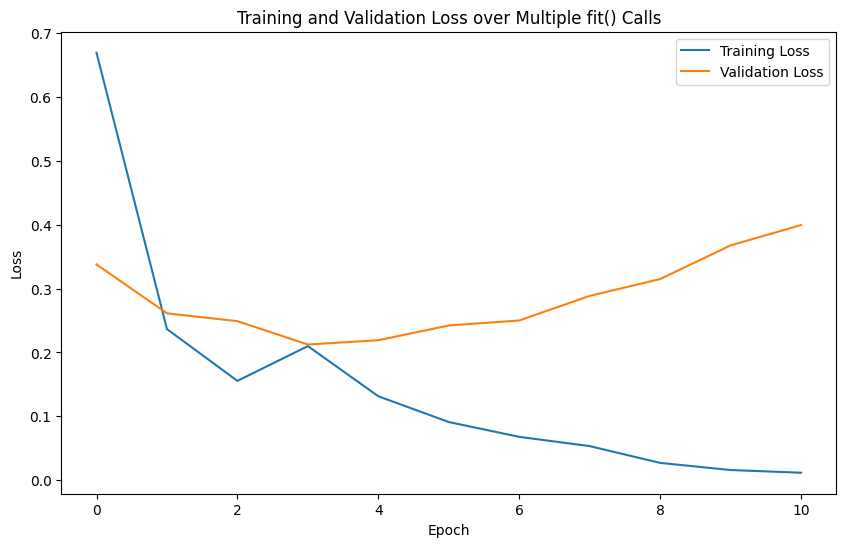

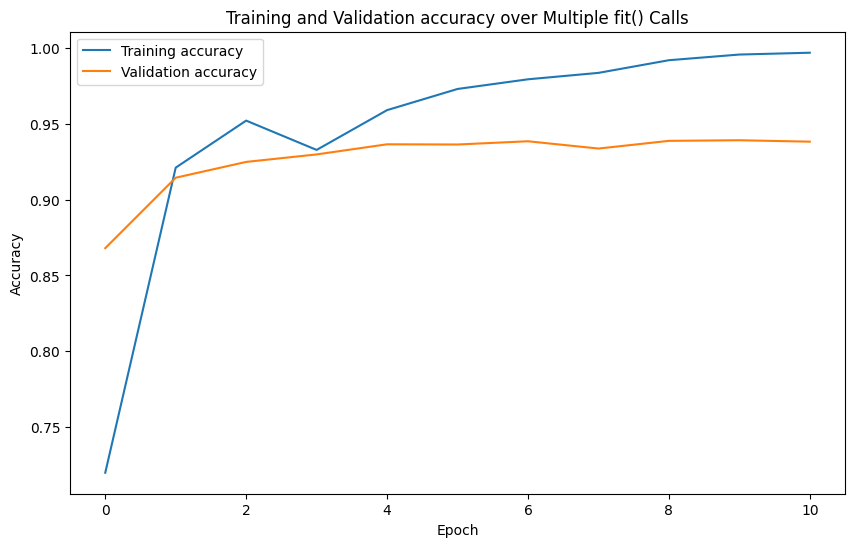

In [21]:
# Combine metrics from all history objects
train_loss = combine_histories(all_histories, metric='loss')
val_loss = combine_histories(all_histories, metric='val_loss')
train_acc = combine_histories(all_histories, metric='sparse_categorical_accuracy')
val_acc = combine_histories(all_histories, metric='val_sparse_categorical_accuracy')

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Multiple fit() Calls')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation accuracy over Multiple fit() Calls')
plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

234/234 [==============================] - 4s 17ms/step - loss: 0.3996 - sparse_categorical_accuracy: 0.9383


# Save our model for future usage

## Set model name, version and path to save it

In [23]:
model_name = "GooglePlayReviewRNN"
model_version = "001"
model_path = Path(model_name) / model_version
model.save(model_path, save_format="tf")

INFO:tensorflow:Assets written to: GooglePlayReviewRNN\001\assets


INFO:tensorflow:Assets written to: GooglePlayReviewRNN\001\assets


## Save the "tokenizer"
It is needed to be able to convert future review text into a proper input of our model

In [24]:
tokenizer_path = model_path / 'tokenizer.pickle'
ordered_categories_path = model_path / 'ordered_categories.pickle'

# saving tokenizer
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Save the categories encoded into a json file

In [26]:
import json

json_labels_path = Path(model_path) / 'labels_GooglePlayReviewRNN.json'

ordered_categories_dict = {}
for cat,i in enumerate(ordered_categories):
        ordered_categories_dict[i] = cat
print(ordered_categories_dict)

with open(json_labels_path, "w") as write_file:
    json.dump(ordered_categories_dict, write_file, indent=4)

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


## Save trained model stats in a json file
It is quite useful to compare models between experiments

In [30]:
import datetime;

# Create a datetime object and Convert the datetime object to a string in a specific format 
date_timestamp = datetime.datetime.now() 
date_timestamp_str = date_timestamp.strftime("%Y-%m-%d %H:%M:%S") 

stats_data = [{
        "compiled_date": date_timestamp_str,
        "loss": {
                "train_loss": train_loss[-1],
                "test_loss": test_loss,
        },
        "accuracy": {
                "train_accuracy": train_acc[-1],
                "test_accuracy": test_accuracy,
        }
}]

json_path = Path(model_path) / 'model_stats.json'

with open(json_path, "w") as write_file:
    json.dump(stats_data, write_file, indent=4)

# Test out model

## Test with any input text (production)
You can write in the variable `test_text` the review that you want to checkout.

In [34]:
test_text = "App that is decent,but the amount of ads this single app dishes out on other apps and youtube is so annoying that I'm having a negative experience with even the word \"shein\".\"Good ads create good customers, Bad annoying pushy ads is what makes people want to avoid your app or anything related as much as possible. It also doesn't help that the ads are so scummy that they put a fake X on the top corner that will force people to the app or the store, which is extremely annoying and just suspicious."

test_tokenized = tokenizer.texts_to_sequences([test_text])
input = tf.keras.preprocessing.sequence.pad_sequences(test_tokenized, maxlen=max_len)

output = model.predict(input)
print("\nraw output: " + str(output))
print("Review: " + str(ordered_categories[np.argmax(output)]))

Tokerized Input: ["app that is decent but the amount of ads this single app dishes out on other apps and youtube is so annoying that i'm having a negative experience with even the word good ads create good customers bad annoying pushy ads is what makes people want to avoid your app or anything related as much as possible it also doesn't help that the ads are so that they put a fake x on the top corner that will force people to the app or the store which is extremely annoying and just"]

raw output: [[9.9999893e-01 9.8227167e-07 1.6791101e-07]]
Review: Negative
